## <center>Assignment 4</center>

#### <center>Gaukhar Dauzhan</center>

#### We will solve the system of linear equations of form $AX = B$, where A and B are matrices of order 30 × 30 and 30 with constant coefficients using LU decomposition method


In [131]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Random generation of matrices A and B with values of elements in range [0,1]

In [132]:
n=30
x=np.zeros(n,float)
b=np.zeros(n,float)
a=np.zeros((n,n),float)
rn.seed('matrix')
for i in range(n):
    b[i]=rn.random()
    for j in range(n):
        a[i,j]=rn.random()

#### Solution of the system: LU decomposition method 

In [133]:
def LUdecomposition (a, b):
    ac=np.copy(a)
    for i in range (n-1):
        
        imax=i
        for k in range (i, n):
            if (ac[k][i]>ac[imax][i]):
                imax=k

        ac[imax], ac[i] = ac[i], np.copy(ac[imax])
        a[imax], a[i] = a[i], np.copy(a[imax])
        b[imax], b[i] = b[i], np.copy(b[imax])
        
        for j in range (i+1, n):    
            factor = ac[j][i]/ac[i][i]
            for k in range (i+1, n):
                ac[j][k]-=factor*ac[i][k]
            ac[j][i]=factor   
    return ac

def LUsolution(ac,b):
    bc = np.copy(b)
    x=np.zeros(n,float)
    for k in range (1,n):
        sum=0
        for m in range (0,k):
            sum+=ac[k][m]*bc[m]
        bc[k]-=sum
    x[n-1]=bc[n-1]/ac[n-1][n-1]
    sum=0
    for k in range(n-2, -1, -1):
        sum=0
        for m in range (k+1,n):
            sum+=ac[k][m]*x[m]
        x[k]=(bc[k]-sum)/ac[k][k]
    return x

In [134]:
ac = LUdecomposition(a, b)

In [135]:
x=LUsolution(ac,b)

#### Substitution of X back to check solution

In order to check how precise is the value of b, x can be substituted back and the precision can be calculated as $$\frac{||\Delta B||}{||B||}$$

In [136]:
def norm(a):
    return np.sum(np.square(a))**0.5

In [137]:
db=np.dot(a,x)-b
accuracy=norm(db)/norm(b)
print(accuracy)

1.65308809598e-14


#### Condition number of matrix A. Is system well-conditioned?

Condition number of a matrix represents how a small change in input leads to the change in output

$$Cond=||A||*||A^{-1}||$$

In [138]:
def cond(a):
    ident = np.identity(n)
    ainv=np.zeros((n,n), float)
    for i in range (n):
        ainv[:, i] = LUsolution(ac, ident[i, :])
    return norm(a)*norm(ainv)

In [139]:
acond=cond(a)
acond

871.50546943466441

#### Consistency of accuracy of the solution with the condition number

Change in input multiplied by condition number gives us estimated output change. If with this change we get precise enough answer we consider matrix to be well-conditioned. That is, the following equation must be satisfied:

$$\frac{||\Delta x||}{||x||}\leq Cond\frac{||\Delta A||}{||A||},$$

In [140]:
def isCons(x):
    dx=LUsolution(ac, db)
    ex=norm(dx)/norm(x)
    ea=1e-16/norm(a)
    print(ex)
    print(acond*ea)
    return ex<=acond*ea

In [141]:
print(isCons(x))

1.43332000835e-13
4.96148754732e-15
False


In this case the output change is too big. However, iterative refinement can be applied in order to improve quality of the solution

#### Iterative refinement of the solution

In [142]:
def ref(imax):
    err = []
    x_ref = LUsolution(ac, b)
    del_b = b-np.dot(a, x_ref)
    del_x=LUsolution(ac, del_b)
    err.append(norm(del_x)/norm(x_ref))
    j=0
    refined=-1
    while(j<imax):
        if (norm(del_x)/norm(x_ref)<=acond*1e-16/norm(a) and refined==-1):
            refined=j;
        x_ref = x_ref + del_x
        del_b = b - np.dot(a, x_ref)
        del_x = LUsolution(ac, del_b)
        error = norm(del_x)/norm(x_ref);
        err.append(norm(del_x)/norm(x_ref))
        j+=1
    return err,refined

In [143]:
err1, refined1 = ref(10)

#### Dependency of quality of the solution on the number of iteration

In [144]:
i=np.arange(11)

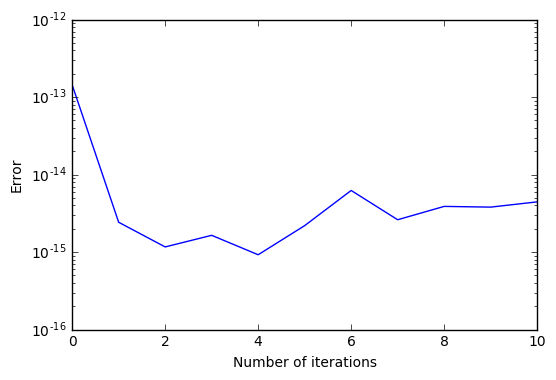

In [145]:
plt.plot(i, err1)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

Condition number of a matrix initially could not give us desired precision in output, however, iterative refinement allowed to improve the quality of the solution